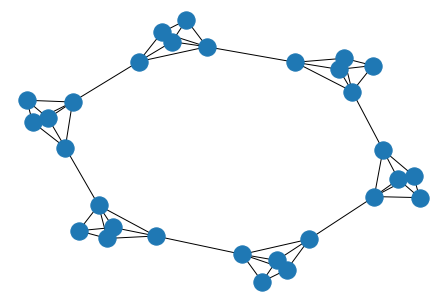

In [1]:
# Create a graph
import networkx as nx
G = nx.connected_caveman_graph(6,5)

# Visualize the graph, for fun
import matplotlib.pyplot as plt
nx.draw(G)

In [2]:
import gurobipy as gp
from gurobipy import GRB

In [3]:
# Create model object
m = gp.Model()

# Create variable for each node
x = m.addVars( G.nodes, vtype=GRB.BINARY )

# Objective function: maximize number of nodes
m.setObjective( gp.quicksum( x[i] for i in G.nodes ), GRB.MAXIMIZE )

# Constraints: from each open triangle, pick at most 2 nodes
for i in G.nodes:
    H = G.subgraph( G.neighbors(i) )
    CH = nx.complement(H)
    for u,v in CH.edges:
        m.addConstr( x[i] + x[u] + x[v] <= 2 )

# Solve
m.optimize()

Academic license - for non-commercial use only - expires 2021-07-26
Using license file C:\Users\Austin\gurobi.lic
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (win64)
Thread count: 2 physical cores, 4 logical processors, using up to 4 threads
Optimize a model with 60 rows, 30 columns and 180 nonzeros
Model fingerprint: 0x171ea90d
Variable types: 0 continuous, 30 integer (30 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [2e+00, 2e+00]
Found heuristic solution: objective 12.0000000
Presolve time: 0.00s
Presolved: 60 rows, 30 columns, 180 nonzeros
Variable types: 0 continuous, 30 integer (30 binary)

Root relaxation: objective 2.400000e+01, 8 iterations, 0.00 seconds

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

*    0     0               0      24.0000000   24.00000  0.00%    

In [4]:
print("Objective:",m.objVal)

selected_nodes = [ i for i in G.nodes if x[i].x > 0.5 ]

print("Selected nodes:", selected_nodes)

Objective: 24.0
Selected nodes: [1, 2, 3, 4, 6, 7, 8, 9, 11, 12, 13, 14, 16, 17, 18, 19, 21, 22, 23, 24, 26, 27, 28, 29]


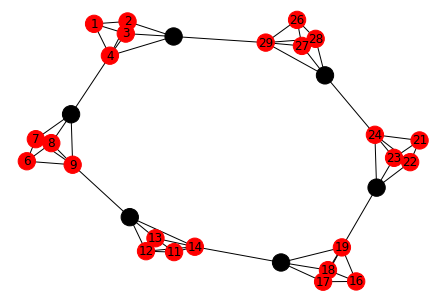

In [8]:
# Visualize the solution
node_colors = [ "red" if i in selected_nodes else "black" for i in G.nodes ]

nx.draw( G, with_labels=True, node_color=node_colors )

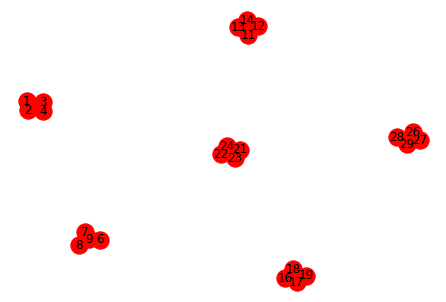

In [9]:
nx.draw( G.subgraph(selected_nodes), with_labels=True, node_color="red")